In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
X = [-0.9924531509396756, 0.9493111782594137, 0.015398502958351434,
     -0.5188458123089683, -0.22308564787498586, -0.730856647237857,
     0.37248086082138787, 0.27039831352397137, -0.9584642768648018,
     -0.3295273625460893, -0.5905141960366497, -0.6997725432657045,
     -0.06270267183037614, -0.4289624389993987, 0.05691519027254244,
     -0.18430762512912546, 0.28719233155558155, -0.7437196774085011,
     -0.61251462659736, 0.28412132635236453, -0.8649627124131621,
     0.12693395455166834]


In [3]:
# GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_input.p", "rb"))
# _, All_Reynolds = pickle.load(open("Constants/Reynolds_set_Valid.p", "rb"))



In [4]:
def scaling_F(ReDP, ReOD, a, b):
    """
    Scaling function is a second degree polynomial
    :param ReDP: design spool speed
    :param ReOD: off-design spool speed
    :return: function value
    """
    return np.array(1 + a * ((ReOD - ReDP) / ReDP) + b * ((ReOD - ReDP) / ReDP) ** 2)


In [10]:
def plot_poly(file_name):
    GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_GEnx/" + file_name, "rb"))
    _, All_Reynolds = pickle.load(open("Constants/Reynolds_" + file_name.strip("CEOD_"), "rb"))


    All_Reynolds = np.array([item for sublist in All_Reynolds for item in sublist])
    GEnx_OD = np.array([item for sublist in GEnx_OD for item in sublist])
    GEnx_OD_true = np.array([item for sublist in GEnx_OD_true for item in sublist])
    
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19 = All_Reynolds.T
    
    Re25_DP = Re25[0]
    Re19_DP = Re19[0]
    Re3_DP = Re3[0]
    Re49_DP = Re4[0]
    Re5_DP = Re5[0]
    
    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                              [Re25_DP, Re19_DP, Re3_DP],
                              ["Re25", "Re19", "Re3"])):
        SF_pr = scaling_F(re_dp, re_i, X[0 + 6*i], X[1 + 6*i])
        print(X[0 + 6*i], X[1 + 6*i])
        print(SF_pr)
        plt.scatter(re_i, SF_pr, label=label)
    plt.legend()
    plt.show()

    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                                  [Re25_DP, Re19_DP, Re3_DP],
                                  ["Re25", "Re19", "Re3"])):
        SF_m = scaling_F(re_dp, re_i, X[2 + 6*i], X[3 + 6*i])
        plt.scatter(re_i, SF_m, label=label)
    plt.legend()
    plt.show()

    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                                  [Re25_DP, Re19_DP, Re3_DP],
                                  ["Re25", "Re19", "Re3"])):
        SF_e = scaling_F(re_dp, re_i, X[4 + 6*i], X[5 + 6*i])
        plt.scatter(re_i, SF_e, label=label)

    plt.legend()
    plt.show()

-0.9924531509396756 0.9493111782594137
[1.         1.00155413 1.0024106  1.00274392 1.00272767 1.00510356
 1.00718736 1.09960431 1.10217501 1.10338849 1.09967674 1.10033065
 1.09880773 1.09341674 1.09127904 1.09069379 1.08986399 1.08772502
 1.08365232 1.0802464  1.07796706 1.07760844 1.07579133 1.07497534
 1.07411346 1.06983308 1.06902055 1.06578284 1.06756209 1.07051225
 1.90204479 1.90643359 1.90356471 1.90487786 1.90643109 1.91420466
 2.00790829 2.00845688 2.00900329 2.01187692 2.0095929  2.01306534
 1.91777265 1.91923618 1.91769096 1.91776839 1.9203399  2.01663962
 2.01456627 2.02301526 2.02728193 1.92810719 2.02518345 1.9312636
 2.03230971 2.02659476 1.93335189 1.93506292 2.02978034 1.93589221
 2.03784834 1.95076742 1.951677   2.04597788 1.95199275 2.04733599
 1.95371414 1.95553323 2.05096343 2.0521013  2.05366627 1.96998862
 1.9699886  2.06490735 2.06752737 2.06676905 2.06690498 2.0677606
 2.07524273 2.07827428 2.07899363 2.07827407 2.077952  ]
0.37248086082138787 0.2703983135239

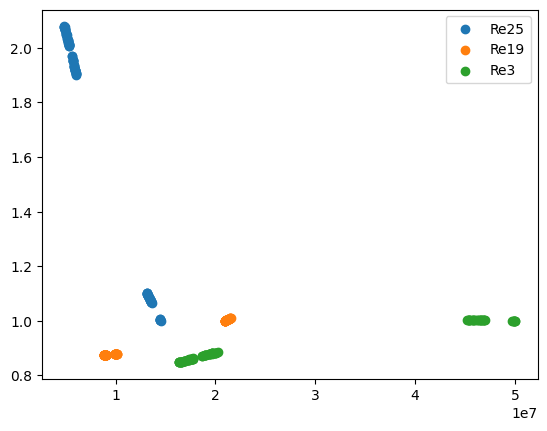

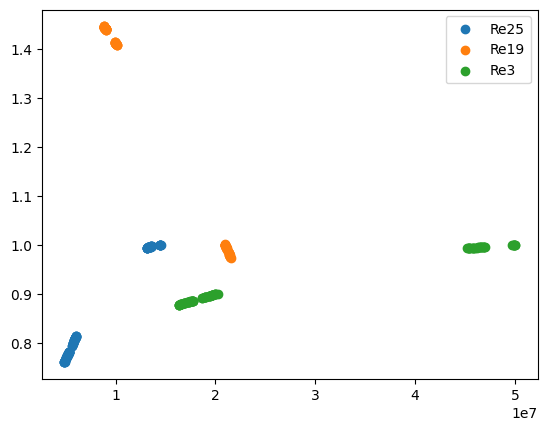

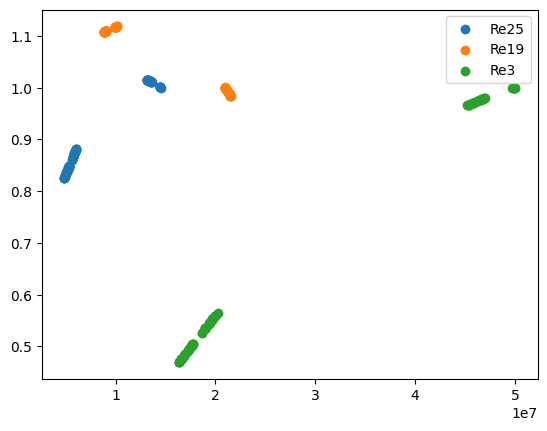

In [11]:
file_name = "CEOD_200408-203904-KLM168____-KATLEHAM-KL_PH-BHA-2-956609-W010FFD.P"
plot_poly(file_name)

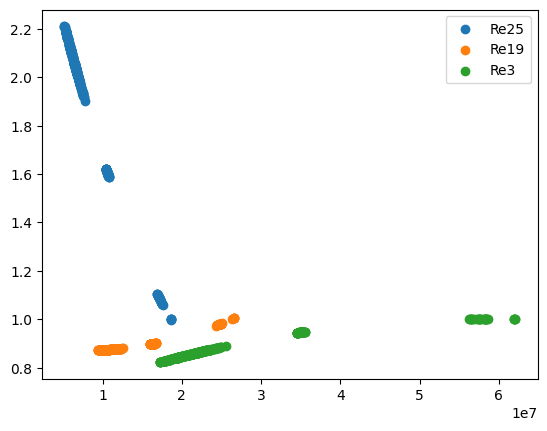

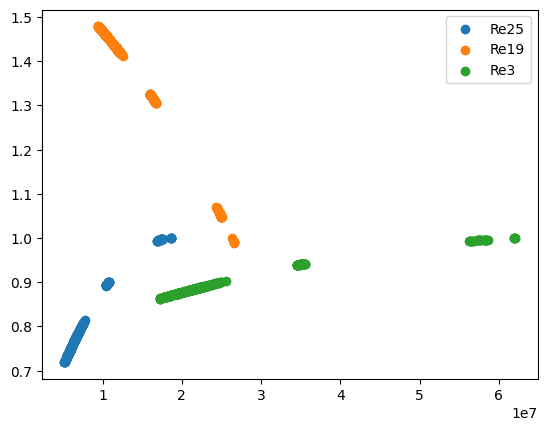

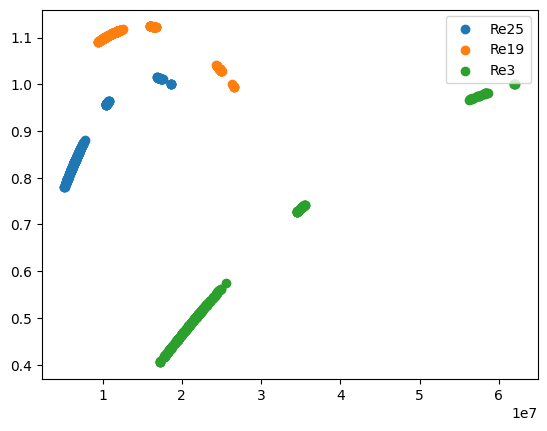

In [7]:
file_name = "CEOD_set_Valid.P"
plot_poly(file_name)